# Building Graphical User Interface For The Model

## Load the Model

load the trained model to classify sign

In [2]:
pip install pyttsx3

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install twilio

     ---------------------------------------- 1.4/1.4 MB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy as np
import numpy
import pandas as pd
import pyttsx3 as pt
from keras.models import load_model
from twilio.rest import Client
model = load_model('traffic_classifier1.h5')

## dictionary to label all traffic signs class.

In [6]:
class_names=['Speed limit (20km/h)',
            'Speed limit (30km/h)', 
            'Speed limit (50km/h)', 
            'Speed limit (60km/h)', 
            'Speed limit (70km/h)', 
            'Speed limit (80km/h)', 
            'End of speed limit (80km/h)', 
            'Speed limit (100km/h)', 
            'Speed limit (120km/h)', 
            'No passing', 
            'No passing veh over 3.5 tons', 
            'Right-of-way at intersection', 
            'Priority road', 
            'Yield', 
            'Stop', 
            'No vehicles', 
            'Veh > 3.5 tons prohibited', 
            'No entry', 
            'General caution', 
            'Dangerous curve left', 
            'Dangerous curve right', 
            'Double curve', 
            'Bumpy road', 
            'Slippery road', 
            'Road narrows on the right',
            'Road work', 
            'Traffic signals', 
            'Pedestrians', 
            'Children crossing', 
            'Bicycles crossing', 
            'Beware of ice/snow',
            'Wild animals crossing', 
            'End speed + passing limits', 
            'Turn right ahead', 
            'Turn left ahead', 
            'Ahead only', 
            'Go straight or right', 
            'Go straight or left', 
            'Keep right', 
            'Keep left', 
            'Roundabout mandatory', 
            'End of no passing', 
            'End no passing veh > 3.5 tons']

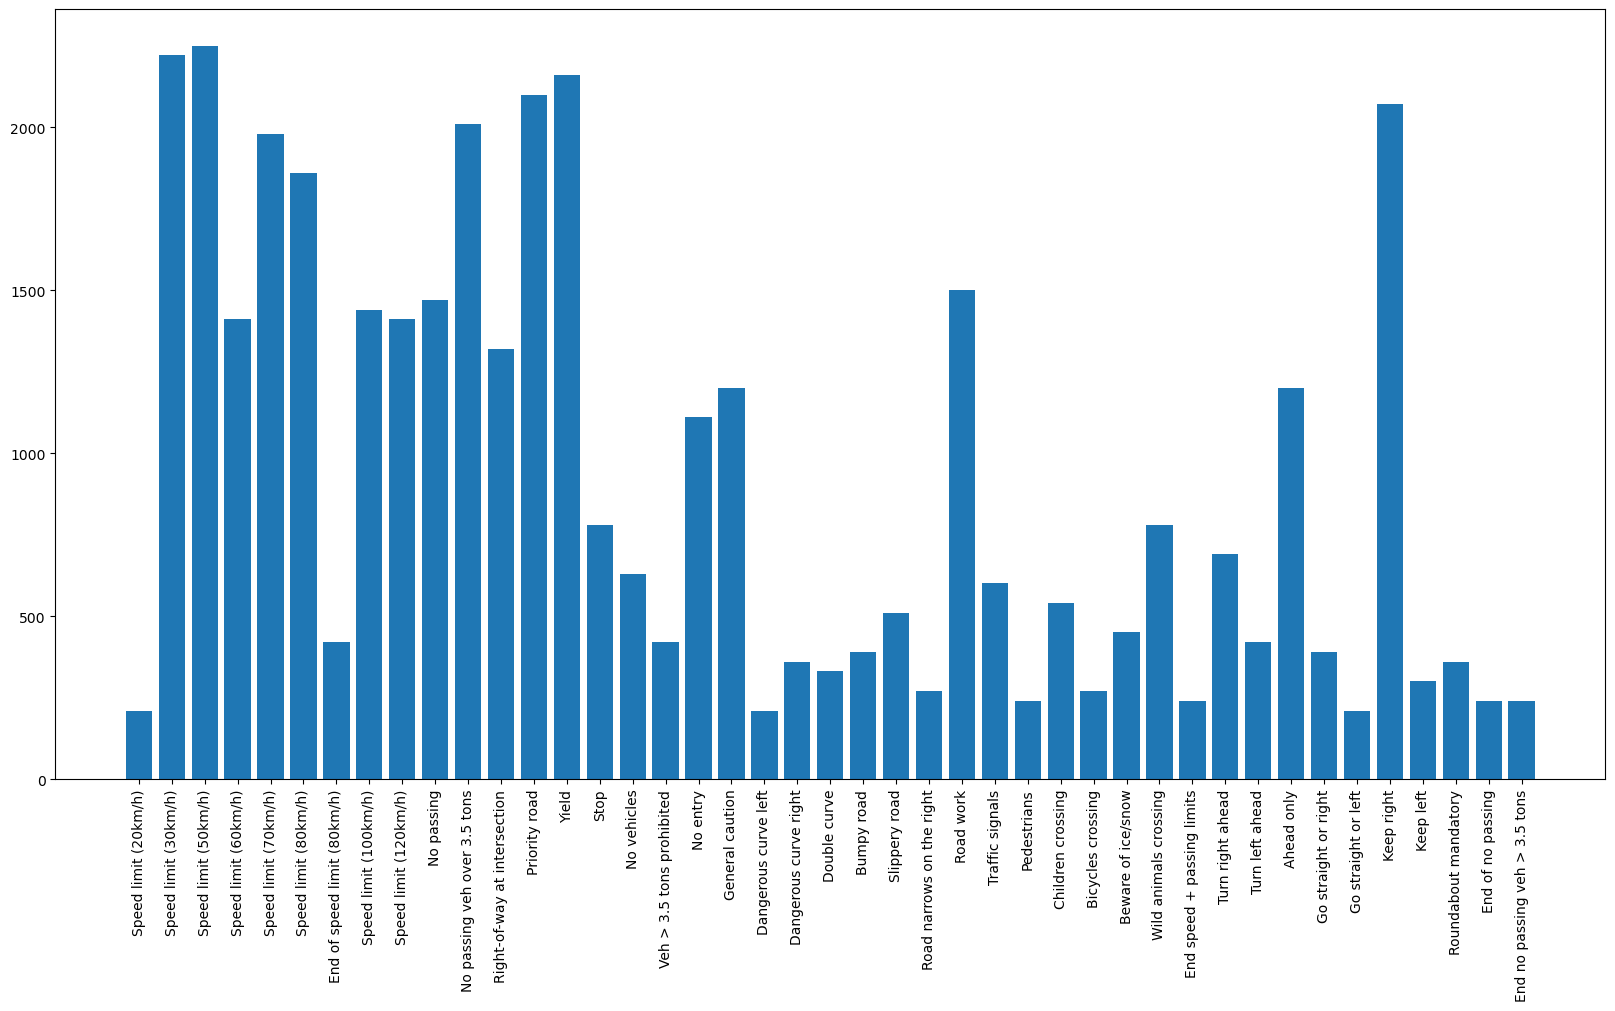

In [8]:
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\j sujan chowdary\Downloads\archive\Train.csv")
data_group = data.groupby("ClassId")["Path"].count()
classId=[]
count=[]
for i in range(len(data_group)):
    li=data_group.tolist()
    classId.append(class_names[i])
    count.append(data_group[i])
    
plt.figure(figsize=(20,10))
plt.bar(classId,count)
plt.xticks(classId,rotation='vertical')
plt.show()

## initialise GUI

In [9]:
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#404258')
label=Label(top,background='#FFCDCE', font=('arial',15,'bold'))
sign_image = Label(top)

In [10]:
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict(image)
    print(pred)
    sign=class_names[np.argmax(pred)]
    print(sign)
    label.configure(foreground='#011638', text=sign)
    ## speech
    text = pt.init()
    text.say(sign)
    text.runAndWait()
    account_sid='ACfe048b97581b3e6dd925617cd83e0d47'
    auth_token='fa81becbc432238d5ad5c3165eca0eb8'
    twilio_number='+12232176011'
    sujan_phone_number='+917780539873'
    rupa_phone_number='+916303706784'
    client = Client(account_sid, auth_token)
    message = client.messages.create(
    body=sign,
    from_ =twilio_number,
    to=sujan_phone_number)
    print(message.body)
    


In [11]:
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#1B202B', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)


In [12]:
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()),(top.winfo_height())))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
        message(file_path1)
    except:
        pass


In [ ]:
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#1B202B', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('artcraft',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()